In [1]:
import pandas as pd
import json
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
from validate_email import validate_email
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb


%matplotlib inline


lead_activity_data = pd.read_csv('/home/monica/l_m_data.csv')

/home/monica/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/monica/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,5,9,11,15,24,32,33,34,41,45,56,90,91,92,93,95,98,99,100,101,102,103,104,105,106,108,112,113,115,116,119,120,121,123,124,128,130,134,135,138,139,140,141,142,143,145,146,148,149,150,151,152,153,154,155,156,157,159) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
for column in lead_activity_data.columns:
    print(column)

Unnamed: 0
ProspectActivityDate_Min
Web_Referrer
Web_RefKeyword
LeadLastModifiedOn
ConversionReferrerURL
SourceReferrerURL
SourceIPAddress
Latitude
Longitude
ProspectID
ProspectAutoId
ProspectActivityId_Max
ProspectActivityId_Min
StatusCode
StatusReason
DeletionStatusCode
RelatedProspectId
SourceReferrer
NotableEvent
NotableEventdate
LastVisitDate
RelatedLandingPageId
FirstLandingPageSubmissionId
FirstLandingPageSubmissionDate
ProspectActivityName_Max
ProspectActivityDate_Max
FirstName
LastName
distinct_id
Phone
Company
Website
DoNotTrack
DoNotEmail
DoNotCall
Source
Mobile
SourceCampaign
SourceMedium
JobTitle
SourceContent
Notes
Score
EngagementScore
Revenue
ProspectStage
QualityScore01
OwnerId
CreatedBy
CreatedByName
CreatedOn
LeadConversionDate
ModifiedBy
ModifiedByName
ModifiedOn
TimeZone
TotalVisits
PageViewsPerVisit
AvgTimePerVisit
mx_Street1
mx_Street2
mx_City
mx_State
mx_Country
mx_Zip
OwnerIdName
OwnerIdEmailAddress
Origin
MailingPreferences
Groups
TwitterId
PhotoUrl
FacebookId

In [3]:
print(lead_activity_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52313 entries, 0 to 52312
Columns: 160 entries, Unnamed: 0 to is_valid_email
dtypes: float64(34), object(126)
memory usage: 63.9+ MB
None


In [4]:
print(list(lead_activity_data['mp_country_code'].unique()))

[nan, 'IN', 'KE', 'US', 'GH', 'FR', 'GB', 'AU', 'NL', 'PK', 'PL', 'BD', 'MY', 'SG', 'SE', 'NP', 'QA', 'CA', 'OM', 'AE', 'LR', 'DE', 'NG', 'SA', 'EG', 'ZA', 'ZM']


In [5]:
print(list(lead_activity_data['ProspectStage'].unique()))

['Engaged Lead', nan, 'Cold', 'Warm Lead', 'seminar', 'Web-chat', 'Fresh Lead', 'Sale', 'email assisted', 'Others', 'Seminar', 'Hot Lead', 'webinar', 'workshop', 'Calendly', 'Webinar', 'Interested Next Batch', 'test_sale', 'Application Link Sent']


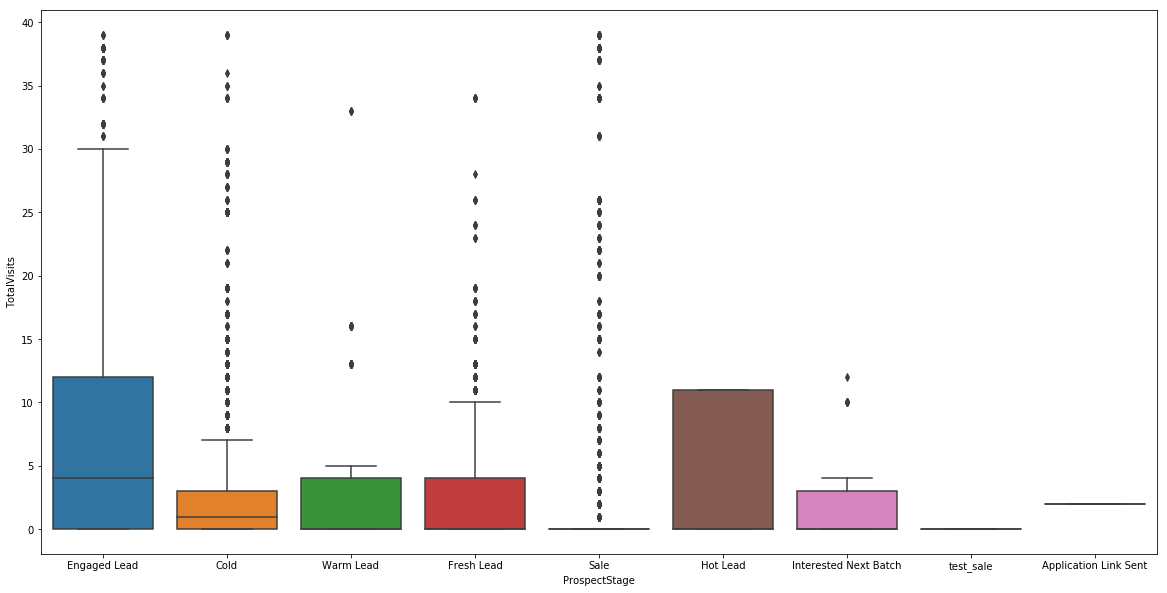

In [6]:
plt.figure(figsize=(20,10))
sns.boxplot(x="ProspectStage", y="TotalVisits", data=lead_activity_data[lead_activity_data["TotalVisits"] <= 40])

[0.0, 0.0, 0.0, nan, nan, 0.0, 0.0, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, 0.0, 2.0]


<BarContainer object of 18 artists>

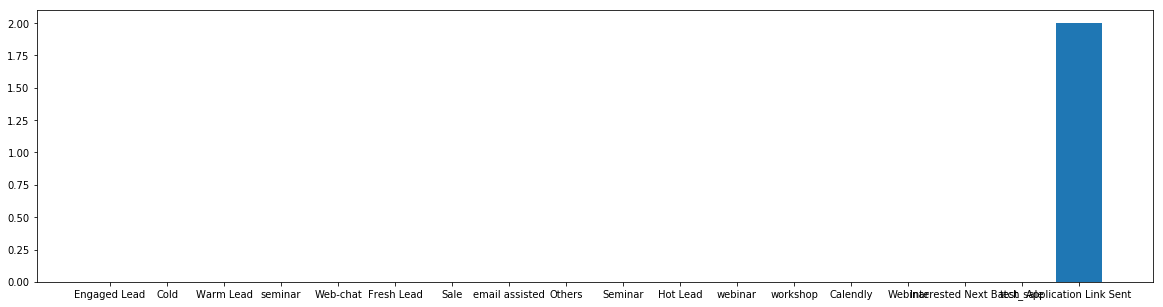

In [7]:
states = list(lead_activity_data['ProspectStage'].unique())
states = [state for state in states if str(state) != 'nan']


min_total_visits = [lead_activity_data[lead_activity_data['ProspectStage'] == state]['TotalVisits'].min() for state in states]
print(min_total_visits)
plt.figure(figsize=(20,5))
plt.bar(states, min_total_visits)



[16.913740458015265, 4.077698549299238, 8.720430107526882, nan, nan, 14.386133603238866, 65.82936288088642, nan, nan, nan, 12.954545454545455, nan, nan, nan, nan, 1.723809523809524, 0.0, 2.0]


<BarContainer object of 18 artists>

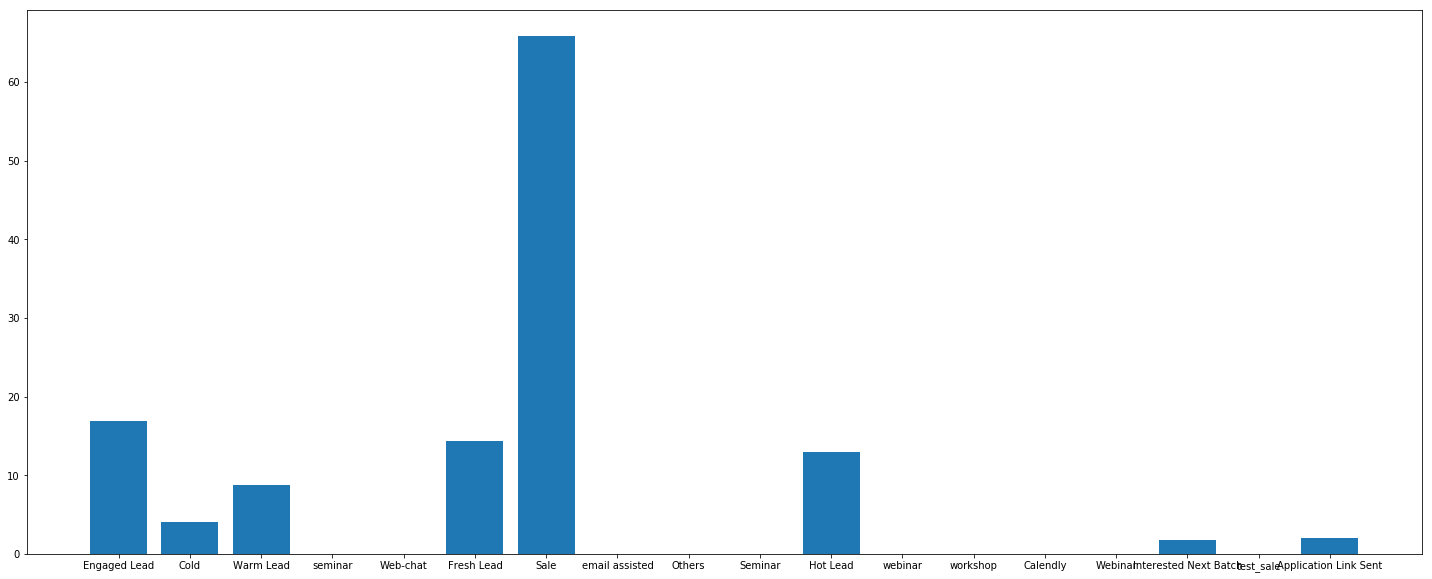

In [8]:
mean_total_visits = [lead_activity_data[lead_activity_data['ProspectStage'] == state]['TotalVisits'].mean() for state in states]
print(mean_total_visits)
plt.figure(figsize=(25,10))
plt.bar(states, mean_total_visits)

[799.0, 224.0, 78.0, nan, nan, 762.0, 970.0, nan, nan, nan, 104.0, nan, nan, nan, nan, 12.0, 0.0, 2.0]


<BarContainer object of 18 artists>

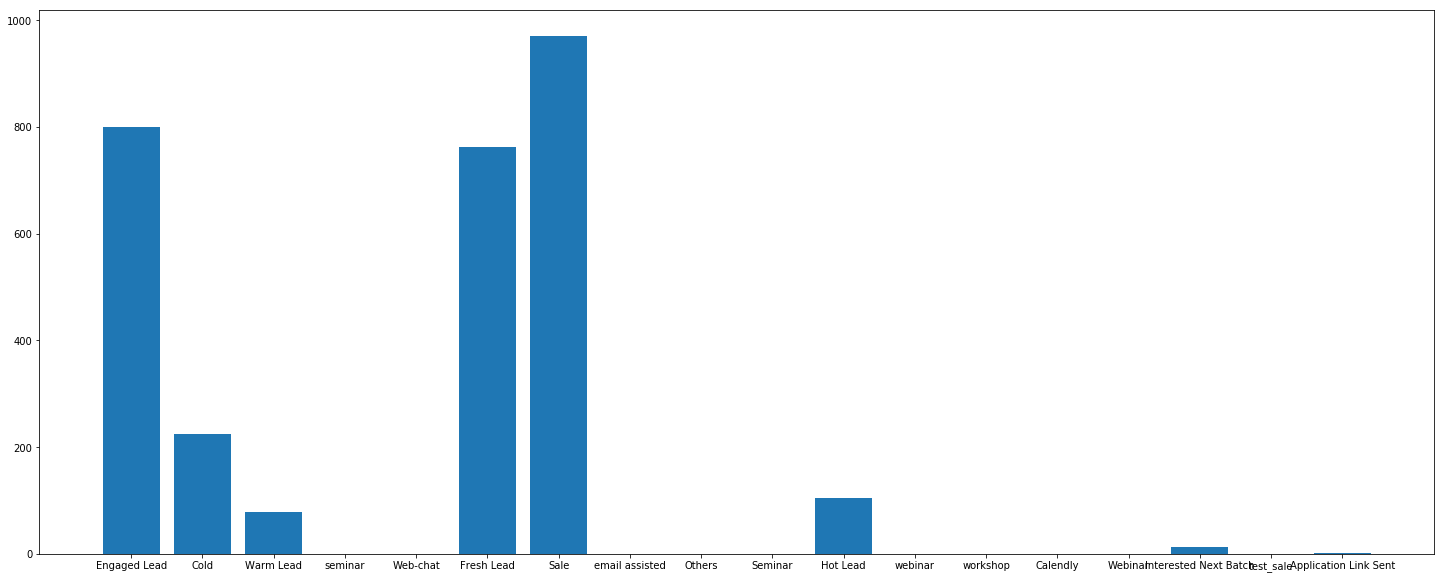

In [9]:
max_total_visits = [lead_activity_data[lead_activity_data['ProspectStage'] == state]['TotalVisits'].max() for state in states]
print(max_total_visits)
plt.figure(figsize=(25,10))
plt.bar(states, max_total_visits)

[799.0, 224.0, 78.0, nan, nan, 762.0, 970.0, nan, nan, nan, 104.0, nan, nan, nan, nan, 12.0, 0.0, 2.0]


<BarContainer object of 18 artists>

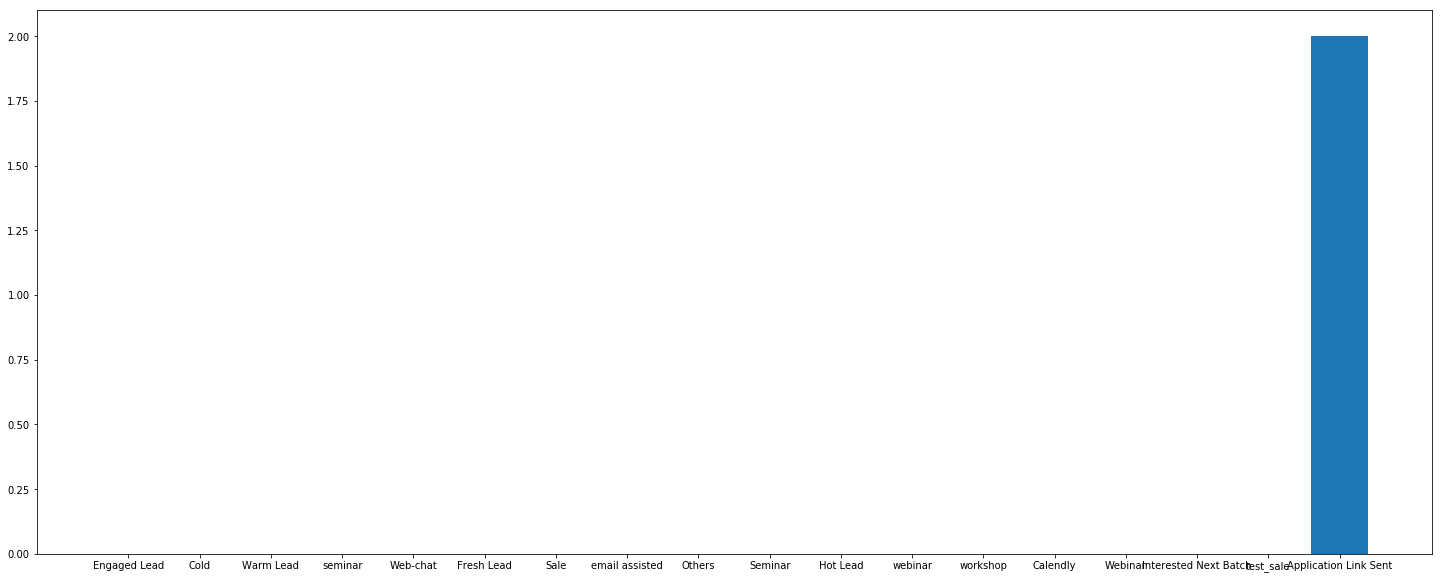

In [10]:
sq_total_visits = [lead_activity_data[lead_activity_data['ProspectStage'] == state]['TotalVisits'].quantile(0.25) for state in states]
print(max_total_visits)
plt.figure(figsize=(25,10))
plt.bar(states, sq_total_visits)

[799.0, 224.0, 78.0, nan, nan, 762.0, 970.0, nan, nan, nan, 104.0, nan, nan, nan, nan, 12.0, 0.0, 2.0]


<BarContainer object of 18 artists>

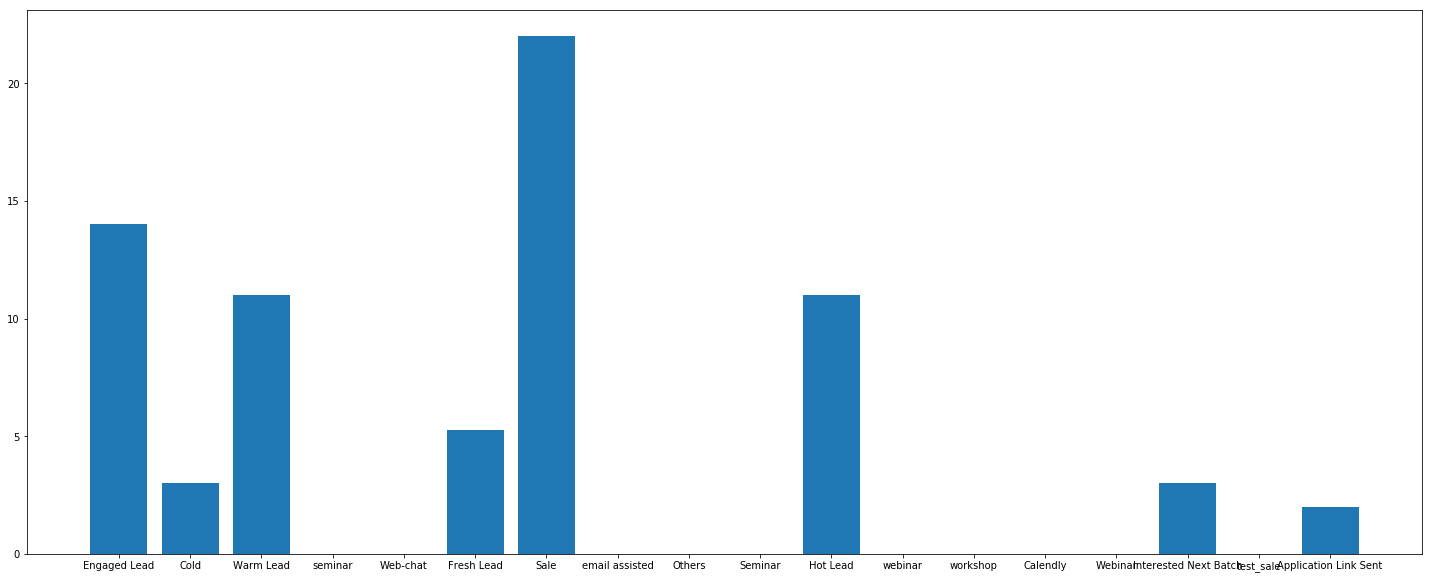

In [11]:
tq_total_visits = [lead_activity_data[lead_activity_data['ProspectStage'] == state]['TotalVisits'].quantile(0.75) for state in states]
print(max_total_visits)
plt.figure(figsize=(25,10))
plt.bar(states, tq_total_visits)

In [12]:
def check_sale(state):
    if(state == 'Sale'):
        return True
    else:
        return False

lead_activity_data['isSale'] = lead_activity_data['ProspectStage'].apply(lambda x:check_sale(x))

In [13]:
lead_activity_data['time'] = pd.to_datetime(lead_activity_data['time'])
print(lead_activity_data['time'].head())

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: time, dtype: datetime64[ns]


#### Is there a relationship between online browsing activity and ProspectStage?

In [14]:
print(list(lead_activity_data['PageViewsPerVisit'].unique()))
lead_activity_data['PageViewsPerVisit'].fillna(0, inplace=True)
lead_activity_data['PageViewsPerVisit'].replace({'false': 0}, inplace=True)
lead_activity_data['PageViewsPerVisit'] = pd.to_numeric(lead_activity_data['PageViewsPerVisit'])
lead_activity_data['initial_referring_domain'],_ = pd.factorize(lead_activity_data['initial_referring_domain'])
lead_activity_data['current_url'], _ = pd.factorize(lead_activity_data['current_url'])
lead_activity_data['mp_country_code'], _ = pd.factorize(lead_activity_data['mp_country_code'])
lead_activity_data['utm_campaign'], _ = pd.factorize(lead_activity_data['utm_campaign'])
                                            

X = lead_activity_data[['TotalVisits', 'PageViewsPerVisit', 'AvgTimePerVisit', 'initial_referring_domain', 'current_url', 'mp_country_code', 'utm_campaign']]
X.fillna(0, inplace=True)
print(X.info())
Y = lead_activity_data['isSale']

pd.isnull(X).sum() > 0


print(X.head(15))

#X['TotalVisits'].fillna(X['TotalVisits'].mean())

['0', nan, 'false', '1', '3', '1.75', '6.33', '1.33', '1.67', '4', '4.1', '15', '3.5', '2', '3.33', '3.67', '6', '5.6', '7.5', '1.5', '2.75', '3.2', '2.5', '2.83', '4.5', '6.14', '5.5', '3.68', '3.27', '2.27', '7.78', '5.25', '4.75', '2.13', '7.25', '2.33', '4.83', '1.88', '11', '4.38', '6.67', '1.73', '4.67', '3.78', '2.62', '2.17', '7', '2.67', '8', '5', '3.6', '9', '2.47', '2.7', '5.67', '4.25', '2.4', '3.4', '3.14', '3.75', '5.33', '4.36', '3.88', '3.96', '1.8', '2.88', '2.2', '2.43', '4.33', '14', '2.16', '1.57', '4.8', '3.12', '4.78', '2.25', '8.43', '1.25', '2.53', '1.58', '4.44', '2.89', '1.2', '4.39', '2.78', '3.64', '6.5', '2.79', '4.02', '4.2', '5.1', '10', '4.54', '5.45', '8.75', '11.33', '2.11', '4.41', '2.64', '4.86', '25', '13', '4.31', '4.22', '3.07', '1.71', '3.36', '2.95', '2.3', '2.6', '2.8', '6.29', '3.06', '7.09', '9.86', '3.25', '3.44', '12.5', '1.86', '4.11', '2.91', '1.63', '1.29', '4.4', '4.13', '3.17', '3.56', '3.47', '2.92', '1.83', '3.13', '2.57', '6.22', '4

/home/monica/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


/home/monica/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/monica/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


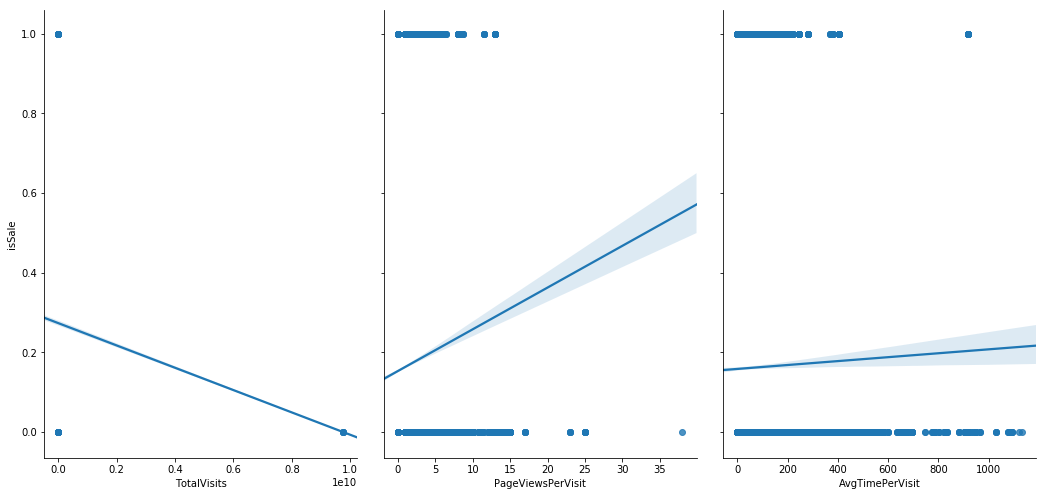

In [15]:
p_data = pd.DataFrame(columns=['TotalVisits', 'PageViewsPerVisit', 'AvgTimePerVisit', 'isSale'])
p_data['TotalVisits'] = lead_activity_data['TotalVisits']
p_data['PageViewsPerVisit'] = lead_activity_data['PageViewsPerVisit']
p_data['AvgTimePerVisit'] = lead_activity_data['AvgTimePerVisit']
p_data['isSale'] = lead_activity_data['isSale']

#sns.pairplot(p_data, hue = 'isSale')
sns.pairplot(p_data, x_vars=['TotalVisits', 'PageViewsPerVisit', 'AvgTimePerVisit'], y_vars='isSale', size=7, aspect=0.7, kind='reg')

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
train_x, test_x, train_lbl, test_lbl = train_test_split(
    X, Y, test_size=0.3, random_state=122)
model = LogisticRegression()
model.fit(train_x, train_lbl)
y_pred = model.predict(test_x)
count_misclassified = (test_lbl != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(test_lbl, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 2529
Accuracy: 0.84


In [17]:
random_forest_model = RandomForestClassifier(random_state=1)
random_forest_model.fit(train_x, train_lbl)
y_pred = random_forest_model.predict(test_x)
count_misclassified = (test_lbl != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(test_lbl, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1788
Accuracy: 0.89


In [18]:
clf = SVC(gamma='auto')
clf.fit(train_x, train_lbl)
y_pred = clf.predict(test_x)
count_misclassified = (test_lbl != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(test_lbl, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 2278
Accuracy: 0.85


In [19]:
dtrain = xgb.DMatrix(train_x, label=train_lbl)
param = {'max_depth': 7, 'eta': 0.01, 'silent': 1, 'objective': 'binary:logistic'}
num_round = 500
bst = xgb.train(param, dtrain, num_round)

In [20]:
dtest = xgb.DMatrix(test_x)
ypred = bst.predict(dtest)

In [21]:
count_misclassified = (test_lbl != ypred).sum()
print('Misclassified samples: {}'.format(count_misclassified))


Misclassified samples: 15694


In [22]:
LR = LinearRegression()
LR.fit(train_x, train_lbl)
y_pred = LR.predict(test_x)

In [23]:
print(metrics.mean_absolute_error(test_lbl, y_pred))
print(metrics.mean_squared_error(test_lbl, y_pred))
print(metrics.r2_score(test_lbl, y_pred))

0.26480118377413714
0.13240519702000125
0.01196033346371328


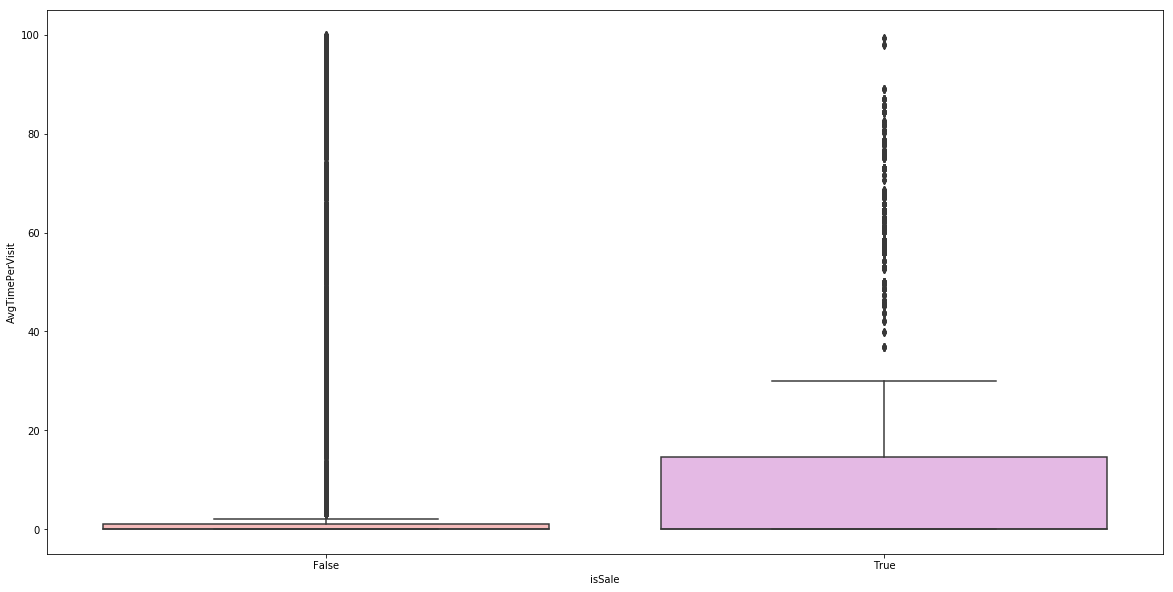

In [24]:
plt.figure(figsize=(20,10))
my_pal = {True: "m", False: "r"}
ax = sns.boxplot(x="isSale", y="AvgTimePerVisit", data=lead_activity_data[lead_activity_data['AvgTimePerVisit']<=100],palette=my_pal)
# Add transparency to colors
for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .3))

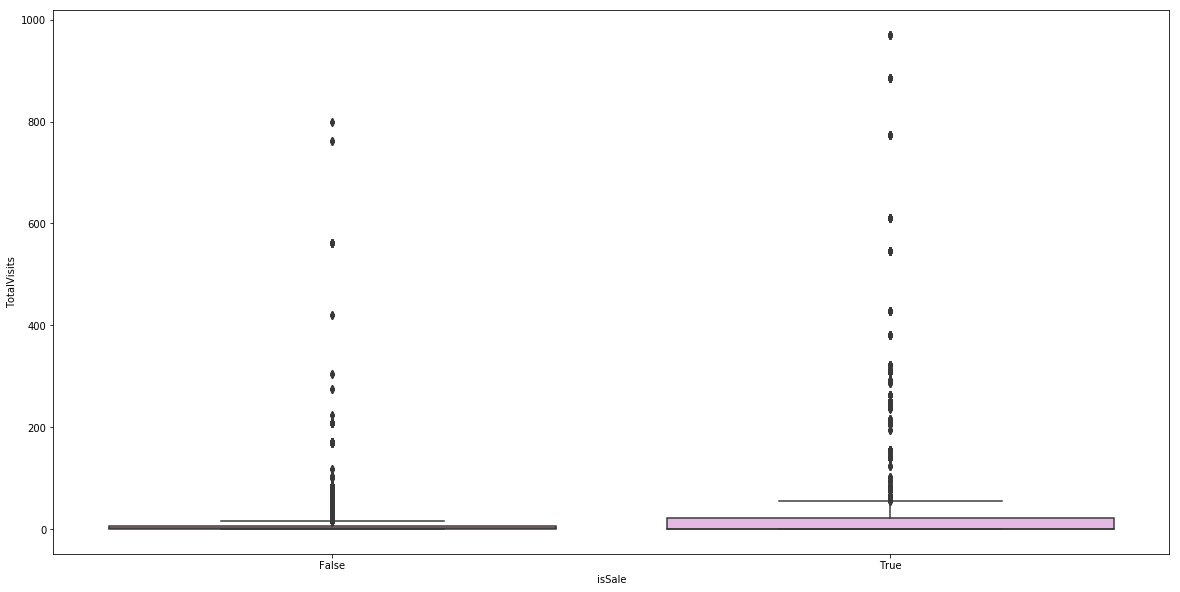

In [25]:
plt.figure(figsize=(20,10))
my_pal = {True: "m", False: "r"}
ax = sns.boxplot(x="isSale", y="TotalVisits", data=lead_activity_data[lead_activity_data['TotalVisits']<=1000],palette=my_pal)
# Add transparency to colors
for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .3))

In [26]:
print(list(lead_activity_data['NotableEvent'].unique()))
print(len(list(lead_activity_data.iloc[0]['NotableEvent'])))




['Modified', nan, 'Lead Capture', 'Facebook Lead Ads Submissions', 'Outbound Phone Call Activity', 'Email Opened', 'Google AdWords Capture', 'RNR-Callback Scheduled', 'Inbound Phone Call Activity', 'Page Visited on Website', 'Voicemail', 'Email Link Clicked', 'SMS Sent', 'Sales Activity', 'Unsubscribed', 'Mailing preference link clicked']
8


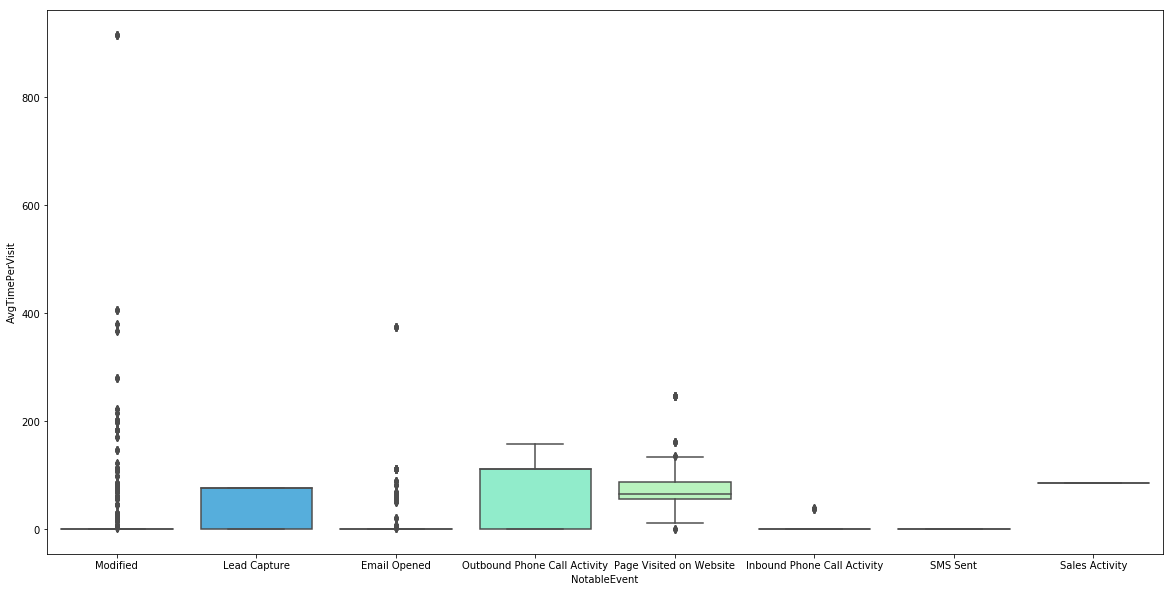

In [27]:
sale_leads = lead_activity_data[lead_activity_data['isSale'] == True]
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="NotableEvent", y="AvgTimePerVisit", data=sale_leads,palette="rainbow")
# Add transparency to colors
for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .8))

In [28]:
print(list(sale_leads['ProspectActivityName_Max'].unique()))

['Page Visited on Website', 'Sales Activity', 'Lead Capture', 'Email Opened', 'Outbound Phone Call Activity', 'Sale', 'Inbound Phone Call Activity', 'SMS Sent', 'Hot', 'Cold', 'Cold-Duplicate', 'Cold-Lost to Competition', 'CallBack-Scheduled', 'SMS Received', 'Cold-DND', 'Registration Paid', 'Facebook Lead Ads Submissions', 'Cold->5 Not Contactable', 'Email Link Clicked', 'Google AdWords Capture', nan]


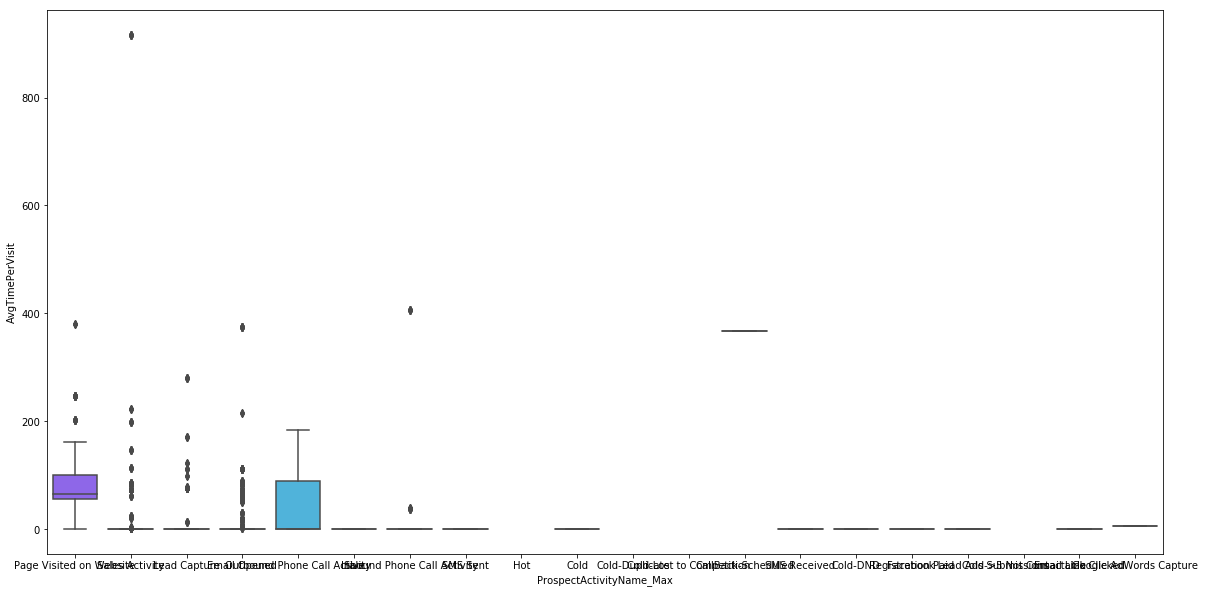

In [29]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="ProspectActivityName_Max", y="AvgTimePerVisit", data=sale_leads,palette="rainbow")
# Add transparency to colors
for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .8))

In [30]:
print(list(sale_leads['event'].unique()))

[nan, 'pageView', 'campaign_delivery', 'coursepage-stickyform-enrollnow-btn', 'course-page-download-syllabus-btn', 'coursepage-navigator-courseoverview', 'coursepage-navigator-whythiscourse', 'coursepage-navigator-curriculum', 'coursepage-navigator-coursecomparison', 'coursepage-navigator-faqs']


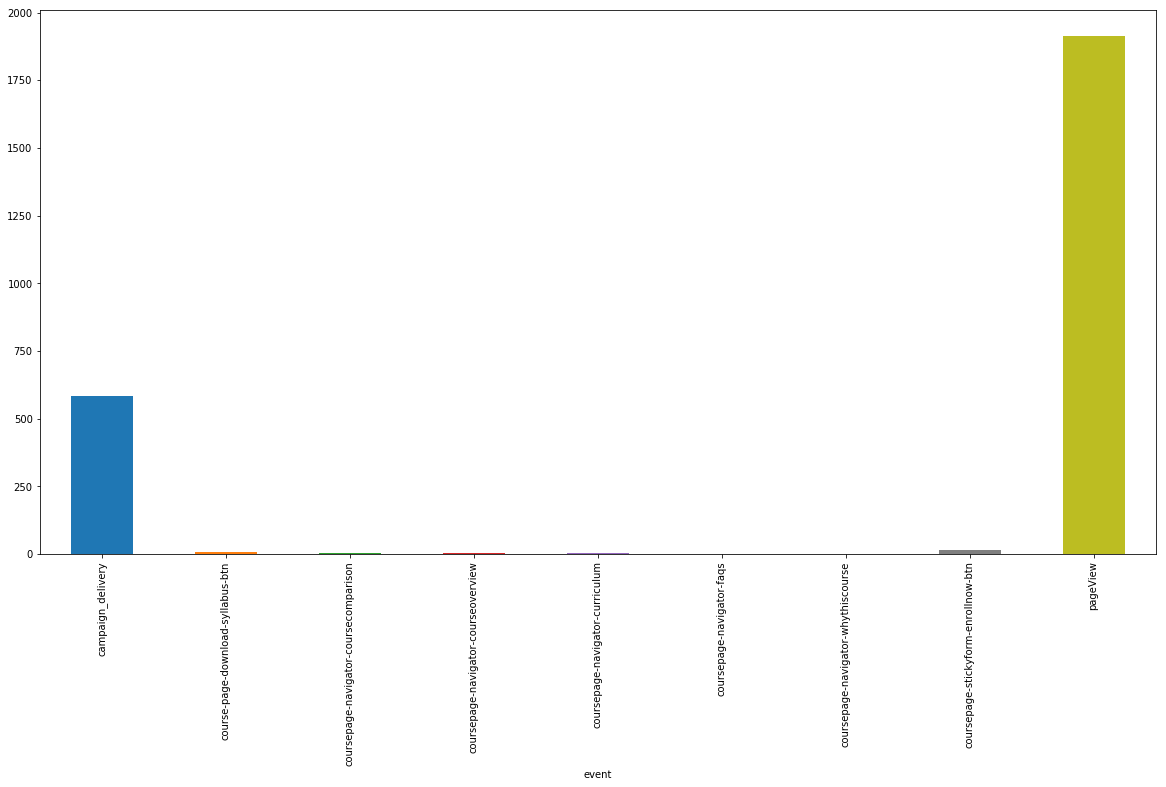

In [31]:
plt.figure(figsize=(20,10))
grouped_data = sale_leads['distinct_id'].groupby(sale_leads['event']).count()

grouped_data.plot(kind='bar')

In [32]:
print(list(lead_activity_data['LastOptInEmailSentDate'].unique()))

[nan, 'web']
